In [1]:
import matplotlib.pyplot as plt
import numpy as np
from vpython import *
def column(matrix, i):
    return [row[i] for row in matrix]

<IPython.core.display.Javascript object>

In [2]:
def strings(length):
    grid = np.zeros(shape=(100, 100, 100))
    grid[0][0][0]=1
    
    points = []
    points.append([0, 0, 0])
    
    for i in range(0, length):
        prevx = points[i][0]
        prevy = points[i][1]
        prevz = points[i][2]
        true =0
        
        while (true==0):
            
            step = np.random.randint(1, 7, size=1)
            if ((step==1) and (grid[prevx+1][prevy][prevz]==0)):
                point = [prevx+1, prevy, prevz]
                grid[prevx+1][prevy][prevz]=1
                true=1
                
            if ((step==2) and (grid[prevx-1][prevy][prevz]==0)):
                point = [prevx-1, prevy, prevz]
                grid[prevx-1][prevy][prevz]=1
                true=1
                
            if ((step==3) and (grid[prevx][prevy+1][prevz]==0)):
                point = [prevx, prevy+1, prevz]
                grid[prevx][prevy+1][prevz]=1
                true=1
                
            if ((step==4) and (grid[prevx][prevy-1][prevz]==0)):
                point = [prevx, prevy-1, prevz]
                grid[prevx][prevy-1][prevz]=1
                true=1
                
            if ((step==5) and (grid[prevx][prevy][prevz+1]==0)):
                point = [prevx, prevy, prevz+1]
                grid[prevx][prevy][prevz+1]=1
                true=1
                
            if ((step==6) and (grid[prevx][prevy][prevz-1]==0)):
                point = [prevx, prevy, prevz-1]
                grid[prevx][prevy][prevz-1]=1
                true=1
                
            else:
                continue
        points.append(point)
        
    return grid, points

In [3]:
def com(points):
    x = column(points, 0)
    y = column(points, 1)
    z = column(points, 2)
    xavg = np.mean(x)
    yavg = np.mean(y)
    zavg = np.mean(z)
    cm = [xavg, yavg, zavg]
    return cm

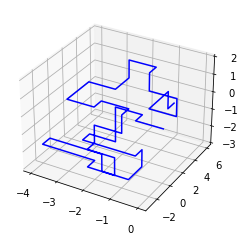

In [4]:
#%matplotlib inline
grid, points= strings(50)
xvals = column(points, 0)
yvals = column(points, 1)
zvals = column(points, 2)


fig = plt.figure()
ax = plt.axes(projection='3d')
plt.plot(xvals, yvals, zvals, color="blue")
plt.show()

In [6]:
# print(len(points))
# print(points)

# print(np.mean(xvals), np.mean(yvals), np.mean(zvals))

In [5]:
scene=canvas()

<IPython.core.display.Javascript object>

In [6]:
string = curve()
string.visible=False
for i in range(0, 51):
    x = points[i][0]
    y = points[i][1]
    z = points[i][2]
    vec = vector(x, y, z)
    string.append(vec)
    
print(np.shape(points))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(51, 3)


In [7]:
timelim = 20
string.visible=True
string.radius=0.07
scene.center = vector(np.mean(xvals), np.mean(yvals), np.mean(zvals))

a = 0
b = 0
c = 0

cenofmass = []
cm = com(points)
cenofmass.append(cm)
t=0
time = [0]
while t<20:
    opt = [[1,0,0],[-1,0,0],[0,1,0],[0,-1,0],[0,0,1],[0,0,-1]]
    last2 = points[49]
    last = points[50]
    true=0
    while (true==0):
        i = np.random.randint(0, len(opt), size=1)
        add = opt[int(i)]
        grid[last[0],last[1],last[2]]=0
        new = [a + b for a,b in zip(last2,add)]
        if (grid[new[0],new[1],new[2]]==0):
            points[50] = new
            grid[new[0],new[1],new[2]]=1
            true = 1
            P = string.point(50)
            new = vector(new[0], new[1], new[2])
            P['pos'] = new
            string.splice(50,1,P['pos'])
        else:
            opt.remove(add)
        
    for j in range(48, 0, -1):
        rate(20)
        x1 = points[j][0]
        y1 = points[j][1]
        z1 = points[j][2]
        prev = points[j-1]
        cur = points[j]
        nex = points[j+1]
        nexx = points[j+2]
        s1 = np.subtract(cur,prev)
        s2 = np.subtract(nex,nexx)
        compare = s1 == s2
        if (compare.all()):
            rand = np.random.randint(1, 5, size=1)
            if (rand==1):
                continue
            if (rand==2):
                thing = -s1
            elif (rand == 3):
                thing = np.cross(s1,np.subtract(cur,nex))
            elif (rand==4):
                thing = -np.cross(s1,np.subtract(cur,nex))
        
            curn = prev + thing
            nexn = nexx + thing
            
            
            if ((grid[curn[0]][curn[1]][curn[2]]==0) and (grid[nexn[0]][nexn[1]][nexn[2]]==0)):
                points[j]=[curn[0], curn[1], curn[2]]
                points[j+1] = [nexn[0], nexn[1], nexn[2]]
                grid[cur[0]][cur[1]][cur[2]]=0
                grid[nex[0]][nex[1]][nex[2]]=0
                grid[curn[0]][curn[1]][curn[2]]=1
                grid[nexn[0]][nexn[1]][nexn[2]]=1
                
                P1 = string.point(j)
                new1 = vector(curn[0], curn[1], curn[2])
                P1['pos'] = new1
                string.splice(j,1,P1['pos'])
                P2 = string.point(j+1)
                new2 = vector(nexn[0], nexn[1], nexn[2])
                P2['pos'] = new2
                string.splice(j+1,1,P2['pos'])
            else:
                continue
            
        x1 = points[j][0]
        y1 = points[j][1]
        z1 = points[j][2]
        prev = points[j-1]
        cur = points[j]
        nex = points[j+1]
        d1 = np.subtract(nex, cur)
        d2 = np.subtract(prev, cur)
        dot = np.multiply(d1,d2)
        compare = dot == [0,0,0]
        if (compare.all()):
            other = np.subtract(nex,cur) + prev
            x2 = other[0]
            y2 = other[1]
            z2 = other[2]
            if (grid[x2][y2][z2]==0):
                rand = np.random.randint(1, 3, size=1)
                if (rand==1):
                    points[j]=[x2,y2,z2]
                    grid[x2][y2][z2]=1
                    grid[x1][y1][z1]=0
                    P = string.point(j)
                    new = vector(x2, y2, z2)
                    P['pos'] = new
                    string.splice(j,1,P['pos'])
                else:
                    continue
            else:
                continue
        else:
            continue
            
    cm = com(points)
    cenofmass.append(cm)
    time.append(t+1)
    t=t+1


24 19 33


In [ ]:
%matplotlib inline

cenofmass = [np.subtract(a,cenofmass[0]) for a in cenofmass]
position = []
positionsqr = []
for n in range(0, len(cenofmass)):
    poscoord = cenofmass[n]
    pos = np.sqrt((poscoord[0]**2 + poscoord[1]**2 + poscoord[2]**2))
    position.append(pos)
    positionsqr.append(pos**2)
    
plt.plot(time, position)
plt.show()
plt.plot(time, positionsqr)
plt.show()

In [11]:
(x,y,z) = np.loadtxt('/Users/Keerthana/Downloads/Not Knots - Sheet1.csv', delimiter=',', unpack=True)

In [9]:
scene = canvas()

<IPython.core.display.Javascript object>

In [12]:
tpoints = []
trefoil = curve()
trefoil.visible=False
tgrid = np.zeros(shape=(20, 20, 20))
for i in range(0, len(x)):
    a = int(x[i])
    b = int(y[i])
    c = int(z[i])
    vec = vector(a,b,c)
    trefoil.append(vec)
    tpoints.append([a,b,c])
    tgrid[a][b][c] = 1
    
trefoil.visible=True
scene.center = vector(-2,1,0)

In [13]:

#trefoil.radius=0.07
trefoil.visible=True
scene.center = vector(-2,1,0)


t=0
while t<30:
    for j in range(49, 0, -1):
        rate(20)
        x1 = tpoints[j][0]
        y1 = tpoints[j][1]
        z1 = tpoints[j][2]
        prev = tpoints[j-1]
        cur = tpoints[j]
        nex = tpoints[j+1]
        d1 = np.subtract(nex, cur)
        d2 = np.subtract(prev, cur)
        dot = np.multiply(d1,d2)
        compare = dot == [0,0,0]
        if (compare.all()):
            other = np.subtract(nex,cur) + prev
            x2 = other[0]
            y2 = other[1]
            z2 = other[2]
            if (tgrid[x2][y2][z2]==0):
                rand = np.random.randint(1, 3, size=1)
                if (rand==1):
                    tpoints[j]=[x2,y2,z2]
                    tgrid[x2][y2][z2]=1
                    tgrid[x1][y1][z1]=0
                    P = trefoil.point(j)
                    new = vector(x2, y2, z2)
                    P['pos'] = new
                    trefoil.splice(j,1,P['pos'])
                else:
                    continue
            else:
                continue
        else:
            continue
    t=t+1


In [ ]:
#do the random walk for the string
#check that the next step space is empty
#if no options are empty, 
prev = [1, 2, 2]
cur = [2, 2, 2]
nex = [2, 3, 2]
d1 = np.subtract(nex, cur)
d2 = np.subtract(prev, cur)
dot = np.multiply(d1, d2)
print(dot)
compare = dot == [0,0,0]
if (compare.all()):
    print("perpendicular")
    other = np.subtract(nex,cur) + prev
else:
    print("not")
    
print(other)
# plt.scatter(1, 3)
# plt.scatter(1, 2)
# plt.scatter(2, 2)
# plt.scatter(2, 3)
print(reversed(range(1, 5)))
c = reversed(range(1, 5))
print(c)